## Logistic Regression Model -  Financial Fraud Detection

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
model_df = pd.read_csv("/Users/sa17/Desktop/financial-fraud/financial-fraud-analysis/data/processed/cleanlog.csv")

model_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6264735,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6264736,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6264737,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6264738,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [120]:
# Declare feature vector and target variable 
X = model_df.drop(["isFraud"], axis=1)

y = model_df["isFraud"]

In [121]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [122]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5011792, 9), (1252948, 9))

In [123]:
# Train Logistic Regression Model default value of C = 1.
lr = LogisticRegression(max_iter=10000, random_state=42, solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [124]:
# Prediction Model
y_pred_test = lr.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no fraud  and 1 is for probability of fraud.

In [125]:
# Probability of getting output as 0 - no fraud
lr.predict_proba(X_test)[:,0]

array([1.      , 0.752927, 1.      , ..., 1.      , 1.      , 1.      ])

In [126]:
# Probability of getting output as 1 - fraud
lr.predict_proba(X_test)[:,1]

array([1.01069366e-024, 2.47073004e-001, 1.11443646e-237, ...,
       0.00000000e+000, 5.18966204e-120, 0.00000000e+000])

Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

In [127]:
print("Initial Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))

Initial Model Accuracy Score: 0.9989


In [130]:
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred_test))


Initial Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.55      0.78      0.64      1659

    accuracy                           1.00   1252948
   macro avg       0.77      0.89      0.82   1252948
weighted avg       1.00      1.00      1.00   1252948



In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. Let's see what happens if we change the parameters.

In [131]:
# Hyperparameter Tuning with RandomizedSearchCV  
param_dist = {"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]} # Logestic Regression between 0 and 1 

random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=6,  # default=10 Number of parameter settings that are sampled. changed to 6 since there only 6 paramaters
    scoring="accuracy",
    cv=5, # default 5 - cross validation
    random_state=42,
    n_jobs=-1, # -1 means using all processors
    verbose=2 # >1 : the computation time for each fold and parameter candidate is displayed
)

random_search.fit(X_train, y_train)

print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................................C=0.1; total time= 1.3min
[CV] END ..............................................C=0.3; total time= 1.3min
[CV] END ..............................................C=0.1; total time= 2.3min
[CV] END ..............................................C=0.1; total time= 2.5min
[CV] END ..............................................C=0.3; total time= 2.5min
[CV] END ..............................................C=0.1; total time= 2.7min
[CV] END ..............................................C=0.1; total time= 2.8min
[CV] END ..............................................C=0.3; total time= 1.8min
[CV] END ..............................................C=0.5; total time=  43.5s
[CV] END ..............................................C=0.3; total time= 3.5min
[CV] END ..............................................C=0.3; total time= 2.3min
[CV] END ........................................

In [132]:
# Retrain Logistic Regression model with the best hyperparameter
param_lr = LogisticRegression(C=0.5, max_iter=10000, random_state=42, solver="liblinear")
param_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=10000, random_state=42, solver='liblinear')

In [133]:
# Predict on the test set
param_y_pred = param_lr.predict(X_test)

param_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
# Evaluate the model
print("Optimized Parameter Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, param_y_pred)))

Optimized Parameter Model Accuracy Score: 0.9979


In [135]:
# Print classification report
print("\nOpitimized Parameter Classification Report:")
print(classification_report(y_test, param_y_pred))


Opitimized Parameter Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.75   1252948
weighted avg       1.00      1.00      1.00   1252948



ROC Curve for Best Line with Best Threshold

In [136]:
# Calculate the False Positive Rate, True Positive Rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

In [137]:
# Calculate Youden's J statistic to find the best threshiold
youden_j = tpr - fpr
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")

# Calculate the Area under curve 
roc_auc = auc(fpr,tpr)
print(f"Area Under Curve: {roc_auc}")

Best Threshold: 0.3357
Area Under Curve: 0.960484572540261


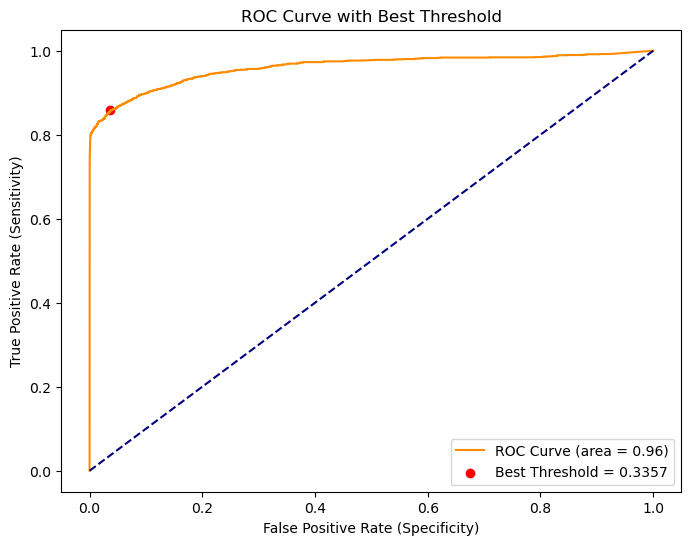

In [138]:
# Plot ROC Curve with the best threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange",label="ROC Curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy" , linestyle="--")
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color="red", label=f"Best Threshold = {best_threshold:.4f}")
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve with Best Threshold")
plt.legend(loc="lower right")
plt.show()

The y-axis represents the True Positive Rate (Sensitivity), which measures how well the model correctly identifies positive instances.

The x-axis represents the False Positive Rate, which measures how often the model incorrectly labels negative instances as positive.

The AUC (area = 0.96) indicates that your model has a high ability to distinguish between classes (fraud vs. non-fraud). An AUC closer to 1.0 means a good model.

The red dot indicates the optimal threshold, which is 0.3357 in this case. This means that when you set your model's decision threshold to 0.339, it achieves the best trade-off between correctly identifying fraud cases and minimizing false positives.


In [139]:
threshold_lr = LogisticRegression(C=0.3357, max_iter=10000, random_state=42, solver="liblinear")
threshold_lr.fit(X_train, y_train)

LogisticRegression(C=0.3357, max_iter=10000, random_state=42,
                   solver='liblinear')

In [140]:
# Predict on the test set
threshold_y_pred = threshold_lr.predict(X_test)

threshold_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
# Evaluate the model
print("Optimized Threshold Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, threshold_y_pred)))

Optimized Threshold Model Accuracy Score: 0.9978


In [142]:
# Print classification report
print("\nOpitimized Threshold Classification Report:")
print(classification_report(y_test, threshold_y_pred))


Opitimized Threshold Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.35      0.80      0.49      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.74   1252948
weighted avg       1.00      1.00      1.00   1252948



Confusion Matrix

In [143]:
y_pred_threshold = (threshold_y_pred >= best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_threshold)

print("Confusion matrix\n\n", cm)

print("\nTrue Positives(TP) = ", cm[0,0])

print("\nTrue Negatives(TN) = ", cm[1,1])

print("\nFalse Positives(FP) = ", cm[0,1])

print("\nFalse Negatives(FN) = ", cm[1,0])

Confusion matrix

 [[1248853    2436]
 [    338    1321]]

True Positives(TP) =  1248853

True Negatives(TN) =  1321

False Positives(FP) =  2436

False Negatives(FN) =  338


<Axes: >

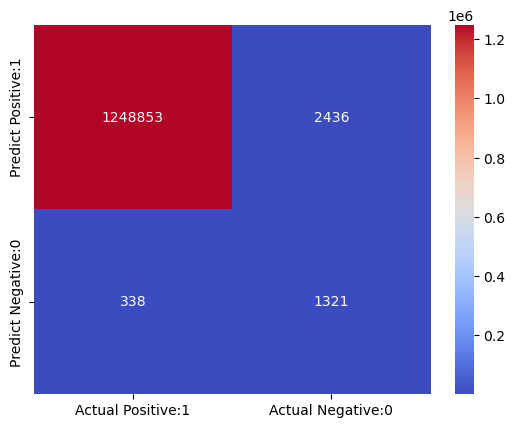

In [144]:
cm_matrix = pd.DataFrame(data=cm, columns=["Actual Positive:1", "Actual Negative:0"], 
                                 index=["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="coolwarm")

The confusion matrix shows 1248853 + 1321 = 1250174 correct predictions and 2436 + 338 = 2774 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 1248853

True Negatives (Actual Negative:0 and Predict Negative:0) - 1321

False Positives (Actual Negative:0 but Predict Positive:1) - 2436 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 338 (Type II error)

Accuracy Conclusion: The model makes 1,250,174 correct predictions out of 1,252,948 total predictions, which aligns with the high accuracy reported.

## Summary
Compare initial, best parameter and best threshold for the model

In [145]:
print("Initial Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))
print("Optimized Parameter Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, param_y_pred))) # best hyperparameter
print("Optimized Threshold Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, threshold_y_pred))) # best threshold

Initial Model Accuracy Score: 0.9989
Optimized Parameter Model Accuracy Score: 0.9979
Optimized Threshold Model Accuracy Score: 0.9978


In [146]:
print("\nInitial Classification Report:")
print(classification_report(y_test, y_pred_test))

print("\nOpitimized Parameter Classification Report:")
print(classification_report(y_test, param_y_pred))

print("\nOpitimized Threshold Classification Report:")
print(classification_report(y_test, threshold_y_pred))


Initial Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.55      0.78      0.64      1659

    accuracy                           1.00   1252948
   macro avg       0.77      0.89      0.82   1252948
weighted avg       1.00      1.00      1.00   1252948


Opitimized Parameter Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.36      0.79      0.50      1659

    accuracy                           1.00   1252948
   macro avg       0.68      0.90      0.75   1252948
weighted avg       1.00      1.00      1.00   1252948


Opitimized Threshold Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1251289
           1       0.35      0.80      0.49      1659

    accuracy                           1.00   1252948
   mac

## Results and Conclusion 

1. Initial Results:

- Model Accuracy Score: 0.9989

- Precision (Fraud): 0.55 (55%) - About 55% of the cases identified as fraud are truly fraud.

- Recall (Fraud): 0.78 (78%) - The model correctly detects 78% of actual fraud cases.

- F1-Score (Fraud): 0.64 (64%) - A balanced measure of precision and recall.

- Observation: The model is heavily biased toward not fraud cases. It achieves high accuracy due to the imbalance but struggles with fraud detection (moderate precision and recall).



2. Optimized Parameter Results:
- Model Accuracy Score: 0.9979

- Precision (Fraud): 0.36 (36%) - Precision drops compared to the initial model.

- Recall (Fraud): 0.79 (79%) - Recall stays similar, indicating that the model still captures a good proportion of fraud cases.

- F1-Score (Fraud): 0.50 (50%) - A significant drop in F1 compared to the initial model.

- Observation: After hyperparameter optimization, the model has improved recall slightly but at the cost of lower precision. This means it catches more fraud cases but also incorrectly labels more not fraud cases as fraud.


3. Optimized Threshold Results:
- Model Accuracy Score: 0.9978

- Precision (Fraud): 0.35 (35%) - Similar to the parameter-optimized model.

- Recall (Fraud): 0.80 (80%) - Slight increase in recall compared to the parameter-optimized model.

- F1-Score (Fraud): 0.49 (49%) - Slight decrease from the parameter-optimized model.

- Observation: Adjusting the threshold mainly increased recall slightly, meaning the model became better at identifying fraud cases, but precision remained low. 


4. Conclusion 
- The initial model had a better balance between precision and recall, as reflected by the higher F1 score.

- The optimized models (especially the threshold-optimized one) were tuned to catch more fraud cases (higher recall), but this slightly compromised precision.

- The optimal threshold of 0.339 provides a good balance between detecting fraud and minimizing false positives.